In [28]:
import torch
import module as m

%reload_ext autoreload
%autoreload 2

In [83]:
lin1 = m.LinearLayer(3, 3)
lin2 = m.LinearLayer(3,1)

x = torch.rand(2, 3)
x

tensor([[0.8272, 0.1682, 0.0409],
        [0.5283, 0.0263, 0.4806]])

In [121]:
model = m.Sequential(
    lin1, 
    m.ReLU(), 
    lin2, 
    m.Tanh(), 
    )

target = torch.rand(2, 1)
target

tensor([[0.1928],
        [0.0455]])

In [122]:
pred = model(x)
pred

tensor([[-0.9478],
        [-0.7800]])

In [125]:
model.loss(pred, target)

tensor(0.9912)

In [127]:
model.backward()

tensor([[0.7543, 0.2777, 0.1991],
        [2.1019, 0.7737, 0.5548]])

In [126]:
# test if tensor is empty


model.loss.gradient

tensor([[-2.2811],
        [-1.6510]])

### Test

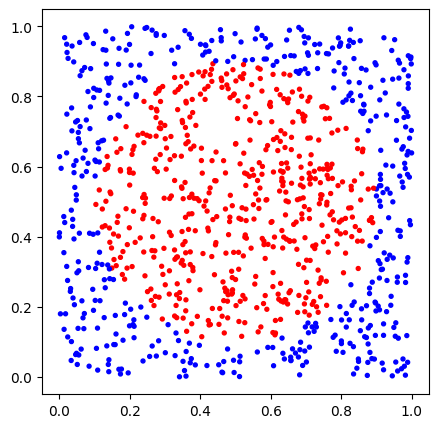

In [142]:
import math
import matplotlib.pyplot as plt

torch.set_grad_enabled(False)

N_SAMPLES = 1000


# Generate train
X_train = torch.rand(N_SAMPLES, 2)
y_train = torch.ones(N_SAMPLES)
X_test = torch.rand(N_SAMPLES, 2) 
y_test = torch.ones(N_SAMPLES)

# Set targets to 0 if outside disk centered at (0.5, 0.5) with radius 1/sqrt(2*pi)

y_train[
    torch.norm(X_train - torch.tensor([0.5, 0.5]), dim=1) \
    > 1/math.sqrt(2*math.pi)
    ] = 0
y_test[
    torch.norm(X_test - torch.tensor([0.5, 0.5]), dim=1) \
    > 1/math.sqrt(2*math.pi)
    ] = 0
    

plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', s=8)


In [236]:
model = m.Sequential(
    m.LinearLayer(2, 10),
    m.Tanh(),
    m.LinearLayer(10, 100),
    m.ReLU(),
    m.LinearLayer(100, 10),
    m.Tanh(),
    m.LinearLayer(10, 1),
    m.Sigmoid(),
)

optim = m.SGD(model, lr=0.01)

In [237]:
epochs = 100
batch_size = 100
n_batches = N_SAMPLES // batch_size

for i in range(epochs):
    # Get random batch
    idx = torch.randint(0, N_SAMPLES, (batch_size,))
    for j in range(n_batches):
        X_batch = X_train[idx]
        y_batch = y_train[idx]

        loss = optim(X_batch, y_batch.unsqueeze(1), debug=False)

    print(f'Epoch {i+1}/{epochs}, Loss: {loss}', end='\r')

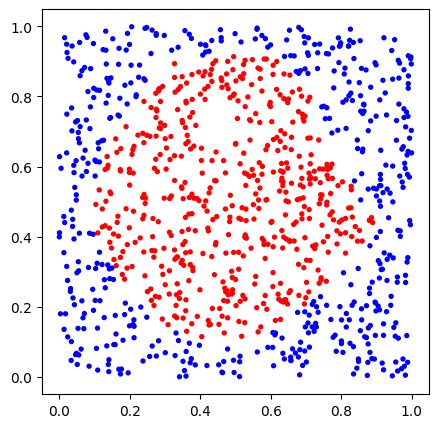

In [238]:
y_pred = model(X_train)
y_pred = y_pred > 0.5

plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred, cmap='bwr', s=8)